# <center>Github DATA visualisation / analysis<center>
## <center>YouCode - Bentaleb SAAD<center>
---
---

In [308]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import output_notebook
output_notebook()
from plot_utils import plot_barplot, draw_points_graph
from bokeh.plotting import figure, show
from bokeh.palettes import Category20c, HighContrast3
from bokeh.transform import cumsum


Loading BokehJS ...

## Loading Data
---

In [309]:
# Loading data from the csv files
repositories_df = pd.read_csv('data/repos.csv')
commits_df = pd.read_csv('data/commits.csv')
languages_df = pd.read_csv('data/languages.csv')

In [310]:
print('Repositories:')
print(repositories_df.info())
print('\nCommits:')
print(commits_df.info())
print('\nLanguages:')
print(languages_df.info())

Repositories:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15490 entries, 0 to 15489
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 15490 non-null  object
 1   url                  15490 non-null  object
 2   description          15490 non-null  object
 3   stars                15490 non-null  int64 
 4   created_at           15490 non-null  object
 5   language             15490 non-null  object
 6   forks                15490 non-null  int64 
 7   watchers             15490 non-null  int64 
 8   open_issues          15490 non-null  int64 
 9   owner                15490 non-null  object
 10  contributors_count   15490 non-null  int64 
 11  contributors         15490 non-null  object
 12  contributions_count  15490 non-null  object
 13  languages            15490 non-null  object
 14  bites_of_code        15490 non-null  object
dtypes: int64(5), object(10)
memory usage: 1

## Data topography
---

### i - Variables correlation

<Axes: >

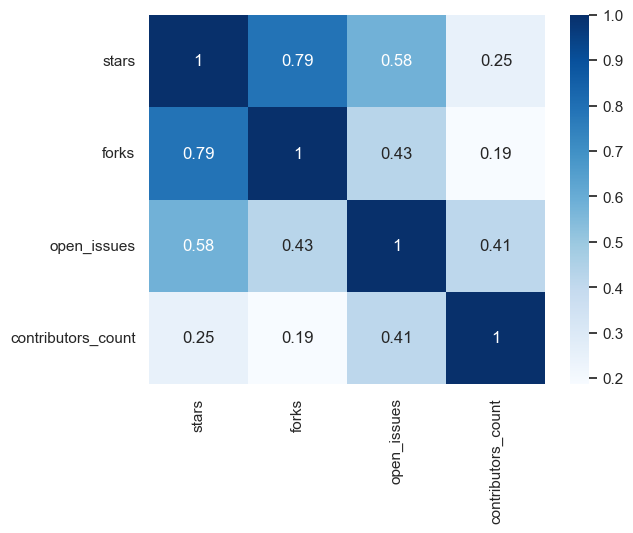

In [311]:
# correlation between variables
corr = repositories_df[['stars', 'forks', 'open_issues', 'contributors_count']].corr()
# plot the heatmap
sns.heatmap(corr, annot=True, cmap='Blues')

In [312]:
# r squared value
print('R squared value between stars and forks: ', round(r2_score(repositories_df['forks'], repositories_df['stars']), 2))

R squared value between stars and forks:  -11.71


In [313]:
draw_points_graph(repositories_df['forks'], repositories_df['stars'], average=False,title="Forks vs Stars")

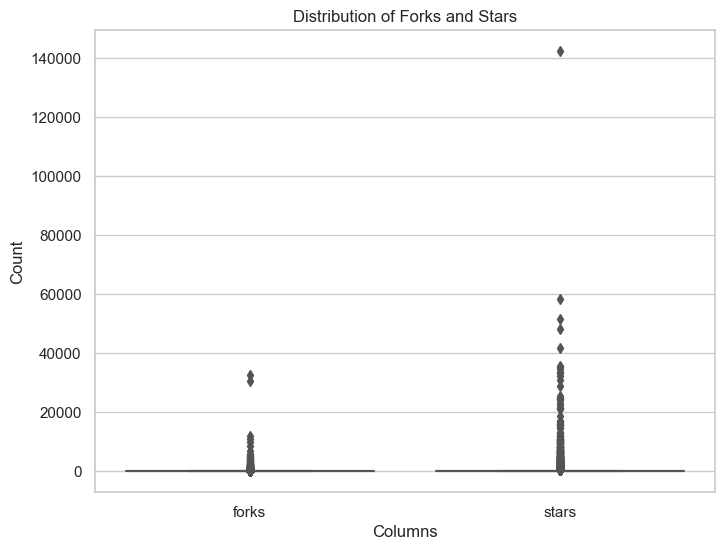

In [314]:
from matplotlib import pyplot as plt
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the boxplot using Seaborn
sns.boxplot(data=repositories_df[['forks', 'stars']], ax=ax)

# Set the labels and title
ax.set_xlabel('Columns')
ax.set_ylabel('Count')
ax.set_title('Distribution of Forks and Stars')

# Display the plot
plt.show()

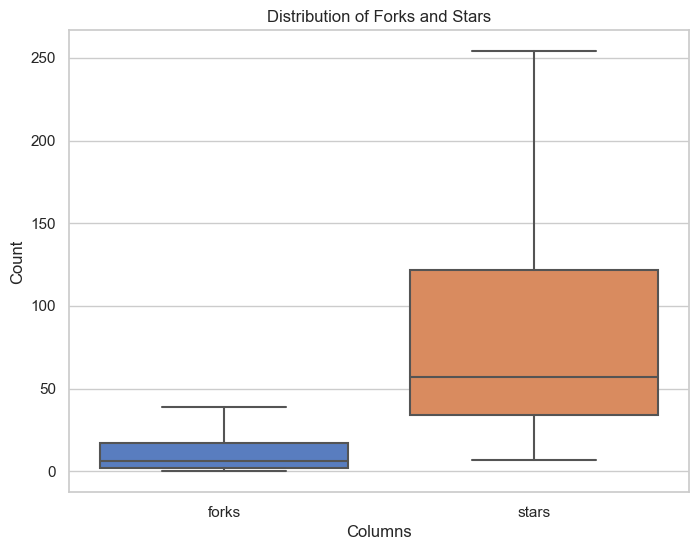

In [315]:
# dont show the outliers
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=repositories_df[['forks', 'stars']], ax=ax, showfliers=False)
ax.set_xlabel('Columns')
ax.set_ylabel('Count')
ax.set_title('Distribution of Forks and Stars')
plt.show()

### ii - Popular languages / technologies correlation

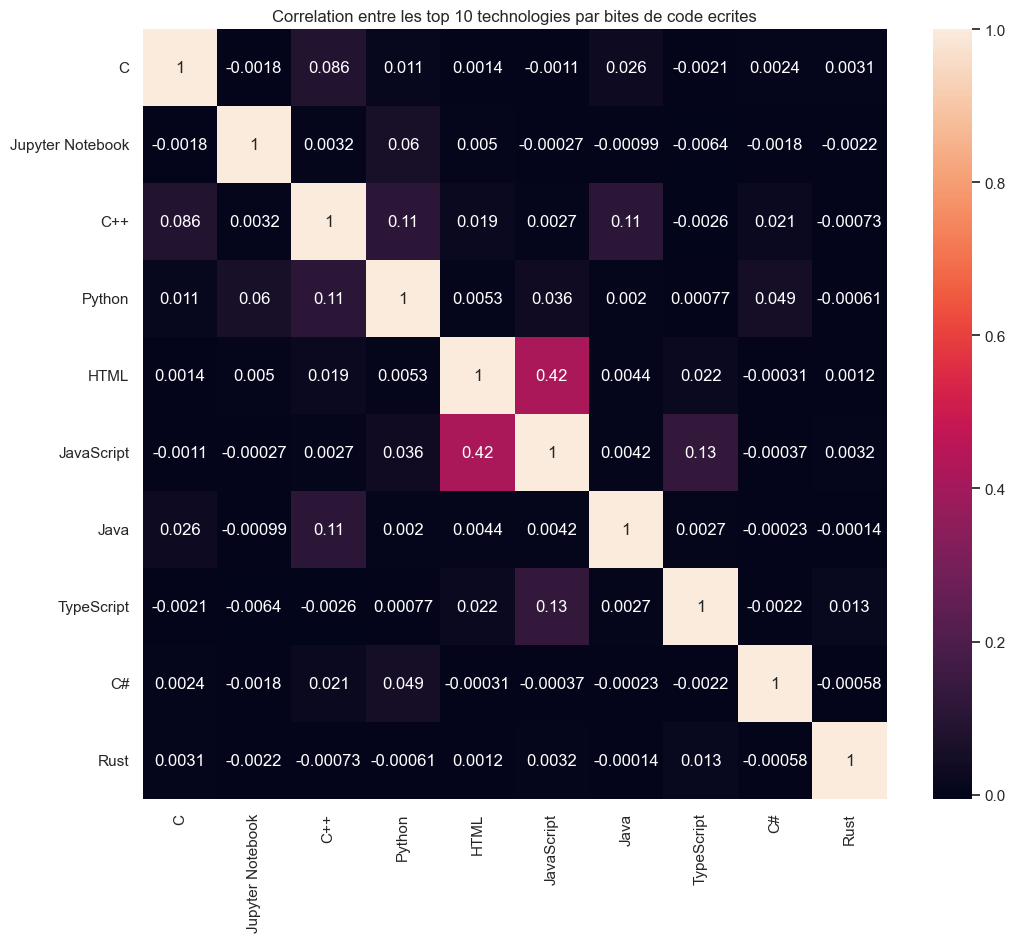

In [316]:
# give the sum of the values for each language
languages_no_url = languages_df.drop('url', axis=1)
sum = languages_no_url.sum().sort_values(ascending=False) / 1000000
# top ten based on the sum columns namesof sum = languages_no_url.sum().sort_values(ascending=False)
top_ten = sum.iloc[:10].index
# correlation entre les technologies
corr_hm = sns.heatmap(languages_no_url[top_ten].corr(), annot=True)
corr_hm.set_title('Correlation entre les top 10 technologies par bites de code ecrites')
# increase the size of the heatmap
corr_hm.figure.set_size_inches(12, 10)

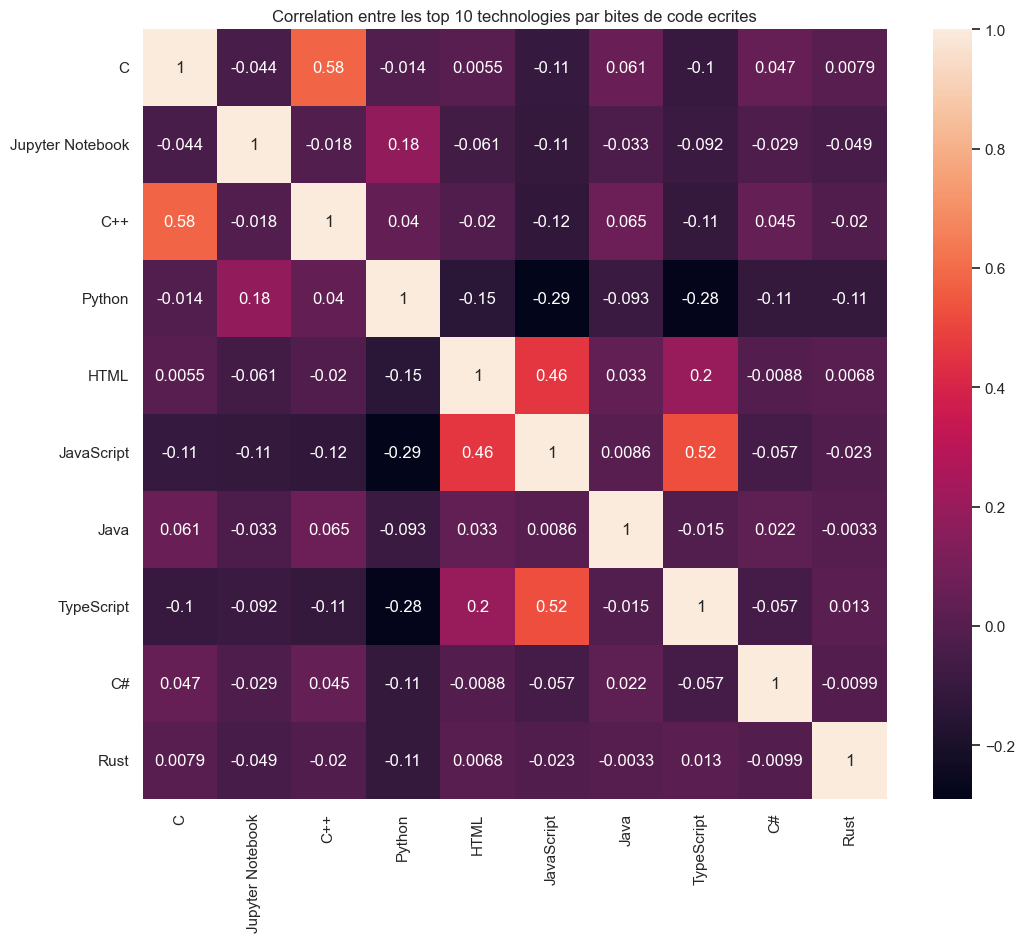

In [317]:
top_ten_for_corr = languages_no_url[top_ten]
# instead of numbers give 1 for each language if the value is not 0
top_ten_for_corr = top_ten_for_corr.applymap(lambda x: 1 if x > 0 else 0)
# correlation entre les technologies
corr_hm = sns.heatmap(top_ten_for_corr.corr(), annot=True)
corr_hm.set_title('Correlation entre les top 10 technologies par bites de code ecrites')
# increase the size of the heatmap
corr_hm.figure.set_size_inches(12, 10)

## Trend analysis
---

### i - popular repositories
---

#### a - By stars / forks
---

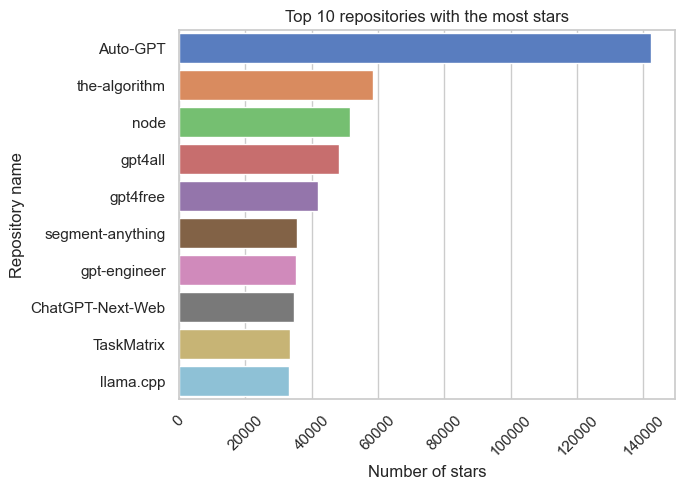

In [318]:
# plot the barplot for the top 10 repositories with the most stars
repositories_df = repositories_df.sort_values(by='stars', ascending=False)
plot_barplot(data=repositories_df.head(10), x='stars', y='name', hue=None, title='Top 10 repositories with the most stars', xlabel='Number of stars', ylabel='Repository name')

In [319]:
repositories_df['sum'] = repositories_df['stars'] + repositories_df['forks'] 
repositories_df = repositories_df.sort_values(by='sum', ascending=False)
repositories = repositories_df['name'].head(10)
data = {'repositories': repositories,
        'stars': repositories_df['stars'].head(10),
        'forks': repositories_df['forks'].head(10)}

p = figure(x_range=repositories, height=500, title="Repository Statistics",
           toolbar_location=None, tools="hover", tooltips="$name @repositories: @$name")

bars = p.vbar_stack(['stars',  'forks'], x='repositories', width=0.9, color=HighContrast3[0:2], source=data,
             legend_label=['Stars',  'Forks'])

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "vertical"

p.xaxis.major_label_orientation = 45

show(p)


#### b - Most active Repositories

### ii - Popular languages / technologies
---

#### a - Per code bytes written
---

In [320]:
languages_no_url = languages_df.drop('url', axis=1)
sum = languages_no_url.sum().sort_values(ascending=False)

data = pd.Series(sum.head(10)).reset_index(name='value').rename(columns={'index':'language'})
data['angle'] = data['value']/data['value'].sum() * 2*np.pi
data['color'] = Category20c[10]


# calculate the percentage of each language then round it to 2 decimal places and convert it to string to be displayed in the legend
data['percentage'] = data['value']/data['value'].sum() * 100
data['percentage'] = data['percentage'].apply(lambda x: round(x, 2))
data['percentage'] = data['percentage'].apply(lambda x: str(x) + '%')

p = figure (title="Top 10 languages / technologies used in 2023", toolbar_location=None, tools="hover", tooltips="@language : @value bytes ( @percentage )" , x_range=(-0.5, 1.0), height=400)

p.wedge(x=0, y=1, radius=0.4, 
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='language', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None


# add the percentage to the graph

show(p)

<b>NB : Consdering jupyter notebooks as python. </b>

In [321]:
languages_df1 = languages_df.copy()
languages_df1['Python'] = languages_df1['Python'] + languages_df1['Jupyter Notebook']
languages_df1 = languages_df1.drop('Jupyter Notebook', axis=1)
languages_no_url = languages_df1.drop('url', axis=1)
sum = languages_no_url.sum().sort_values(ascending=False)

data = pd.Series(sum.head(10)).reset_index(name='value').rename(columns={'index':'language'})
data['angle'] = data['value']/data['value'].sum() * 2*np.pi
data['color'] = Category20c[10]

# calculate the percentage of each language then round it to 2 decimal places and convert it to string to be displayed in the legend
data['percentage'] = data['value']/data['value'].sum() * 100
data['percentage'] = data['percentage'].apply(lambda x: round(x, 2))
data['percentage'] = data['percentage'].apply(lambda x: str(x) + '%')

p = figure (title="Top 10 languages / technologies used in 2023 (Python = python + ipynb)", toolbar_location=None, tools="hover", tooltips="@language : @value bytes ( @percentage )" , x_range=(-0.5, 1.0), height=400)

p.wedge(x=0, y=1, radius=0.4, 
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='language', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

#### b - Per dominant language in the repositories
---

In [322]:
# languages labels from the languages_df
languages = languages_df.columns[1:]

# create a new dataframe to store the number of repositories that use each language
languages_count = pd.DataFrame(columns=['language', 'count'])

# iterate over the languages and count the number of repositories that use each language
counts = []
for language in languages:
    # check if language is in the first 2 languages of the repository
    count = repositories_df['languages'].str.contains(language, regex= False).sum()    
    counts.append(count)

# add the languages and the counts to the dataframe
languages_count['language'] = languages
languages_count['count'] = counts

# sort the dataframe by the count of each language
languages_count = languages_count.sort_values(by='count', ascending=False)

Text(0.5, 1.0, 'Top 10 technologies majorly used in projets')

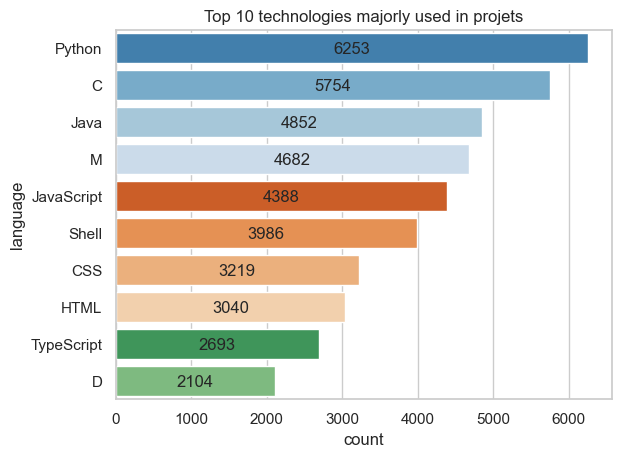

In [323]:
# top 10 most occuring languages 
plt = sns.barplot(x = 'count',y='language', data=languages_count.head(10), palette='tab20c')

# add the value counts to the plot in the middle of the bars 
for p in plt.patches:
    plt.annotate(format(p.get_width(), '.0f'), 
                 (p.get_width() /2, p.get_y() + p.get_height()), 
                 ha = 'center', va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')
plt.set_title('Top 10 technologies majorly used in projets')

In [324]:
import pandas as pd
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, show

# Define the list of languages you want to analyze
languages = languages_count['language'].head(4).tolist()
# date column is in string format, convert it to datetime
repositories_df['created_at'] = pd.to_datetime(repositories_df['created_at'])

# Filter the repositories_df based on the specified time period
start_date = '2023-01-01T00:03:06Z'
end_date = '2023-08-30T22:02:38Z'
filtered_df = repositories_df[
    (repositories_df['created_at'] >= start_date) &
    (repositories_df['created_at'] <= end_date)
]

# Create a figure
p = figure(width=1000, height=600, x_axis_type="datetime")
p.title.text = 'Language Usage in Repositories'

# Set the color palette for the lines
color_palette = Spectral4[:len(languages)]

# Iterate over the languages and plot the usage
for language, color in zip(languages, color_palette):
    # Count the occurrences of the language per month
    monthly_counts = filtered_df[filtered_df['languages'].str.contains(language , regex= False)].groupby(pd.Grouper(key='created_at', freq='M')).size()
    df = pd.DataFrame({'created_at': monthly_counts.index, 'count': monthly_counts.values})
    p.line(df['created_at'], df['count'], line_width=3.5, color=color, alpha=0.8, legend_label=language)

# Configure the legend
p.legend.location = "top_right"
p.legend.orientation = "vertical"
p.legend.click_policy = "hide"
p.legend.title = 'Languages Magorly Used'

# Display the plot
show(p)


### iii - Languages in popular Repos
---

## Active actors and possible collaborations
---